Data Analysis and Preprocessing

In [44]:
# Import python library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
import os,sys

In [2]:
# Get the absolute path of the parent directory
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [ ]:
# import util functions
from scripts.utils import  *

In [3]:
# Load the datasets
fraud_data = pd.read_csv("../data/Fraud_Data.csv")
credit_data = pd.read_csv("../data/creditcard.csv")
ipAddress = pd.read_csv("../data/IpAddress_to_Country.csv")

In [4]:
# Get the head for fraud dataset
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
# Get the head for creadit card dataset
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Get the head for address dataset
ipAddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
# Check null value on fraud dataset
fraud_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [8]:
# Check null value on creadit dataset
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Check null value on ipAddress dataset
ipAddress.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [10]:
# Check duplicate value on fraud dataset
fraud_data.duplicated().sum()

np.int64(0)

In [11]:
# Check dupicatee value on credit dataset
credit_data.duplicated().sum()

np.int64(1081)

In [12]:
# check duplicate value on ipAddress dataset
ipAddress.duplicated().sum()

np.int64(0)

In [13]:
# Remove duplicates and correct data types
credit_data.drop_duplicates(inplace=True)

In [14]:
# Convert 'signup_time' and 'purchase_time' to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

In [15]:
# data types after conversion
print(fraud_data.dtypes)

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


Summary Statistics

In [16]:
# Summary Statistics of numerical features
fraud_data.describe(include='number')

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [17]:
# Statistical summary of object data features
fraud_data.describe(include='object')

,device_id,source,browser,sex
count,151112,151112,151112,151112
unique,137956,3,5,2
top,NGQCKIADMZORL,SEO,Chrome,M
freq,20,60615,61432,88293


In [18]:
# Summary Statistics of numerical features
credit_data.describe(include='number')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Exploratory Data Analysis (EDA)


Univariate Analysis

In [19]:
features = ['purchase_value', 'age']

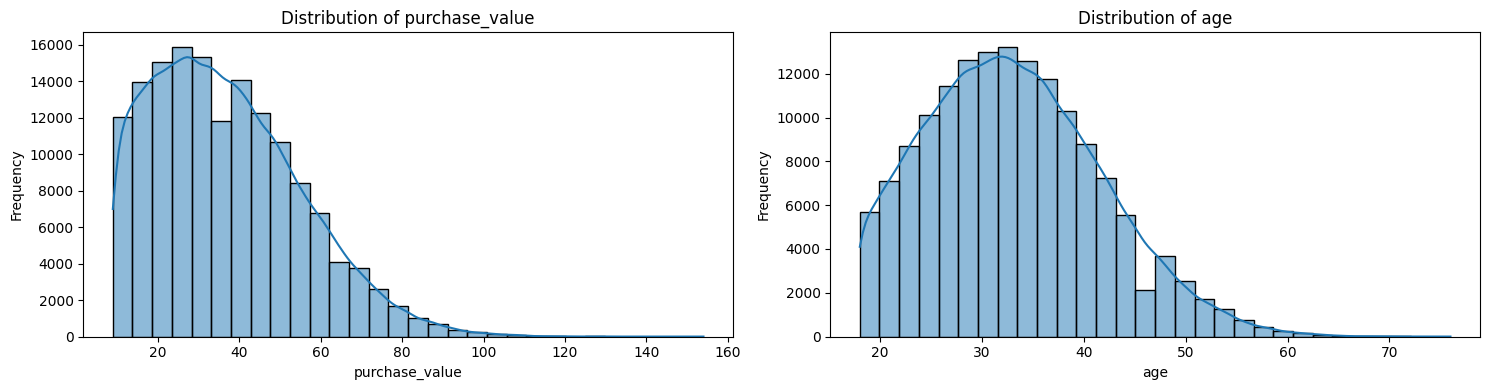

In [24]:
plot_histograms(fraud_data,features)

Bivariate analysis

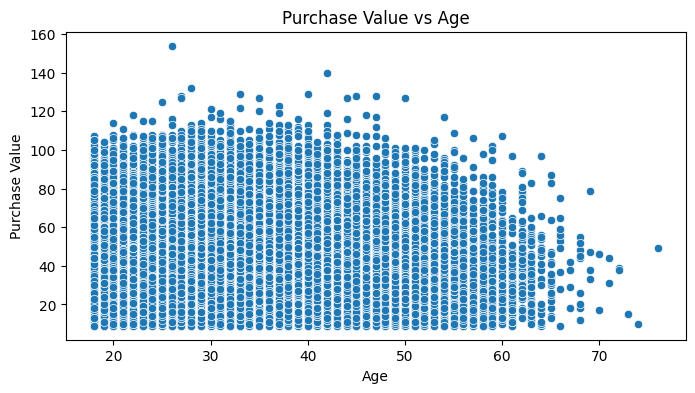

In [34]:
visualize_bivariate_relationship(fraud_data,features)

Merge Datasets for Geolocation Analysis


In [35]:
import socket
import struct
def ip_to_int(ip):
    """Convert an IP address into its integer representation."""
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except socket.error:
        return None  # Return None for invalid IP addresses

# Create a copy of the fraud data DataFrame
fraud_data = fraud_data.copy()

# Load country data mapping IP ranges to countries from CSV
ip_country_data = pd.read_csv('../data/IpAddress_to_Country.csv')

# Convert IP addresses in the fraud data to integer format
fraud_data['ip_int'] = fraud_data['ip_address'].apply(lambda x: ip_to_int(str(int(x))) if not pd.isna(x) else None)

# Remove rows with invalid IP addresses (where ip_int is None)
fraud_data.dropna(subset=['ip_int'], inplace=True)

# Convert the IP address bounds in the country data to integer type
ip_country_data['lower_bound_ip_address'] = ip_country_data['lower_bound_ip_address'].astype(int)
ip_country_data['upper_bound_ip_address'] = ip_country_data['upper_bound_ip_address'].astype(int)

# Sort both DataFrames by IP integer values for merging
fraud_data.sort_values('ip_int', inplace=True)
ip_country_data.sort_values('lower_bound_ip_address', inplace=True)

# Perform an asof merge to associate fraud data with country data based on IP range
merged_data = pd.merge_asof(
    fraud_data,
    ip_country_data,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'  # Use the nearest lower bound
)

# Filter merged data to keep only rows where ip_int falls within the defined bounds
merged_data = merged_data[(merged_data['ip_int'] >= merged_data['lower_bound_ip_address']) &
                          (merged_data['ip_int'] <= merged_data['upper_bound_ip_address'])]

# Drop the columns for lower and upper bounds as they are no longer needed
merged_data.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'], inplace=True)

merged_data.to_csv('../data/merged_fraud_data.csv')

merged_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,16778864,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,16842045,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,16843656,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,16938732,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,16971984,Thailand


Feature Engineering


In [36]:
# Transaction frequency and velocity
fraud_data['transaction_time_diff'] = fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds()

# Frequency of transactions per user
fraud_data['transaction_count'] = fraud_data.groupby('user_id')['purchase_time'].transform('count')

# Time-based features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

In [37]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,transaction_time_diff,transaction_count,hour_of_day,day_of_week
110447,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093.496895,0,52093,NaN,1,10,6
2589,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447.138961,0,93447,NaN,1,17,4
16752,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818.501505,0,105818,NaN,1,8,1
51261,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566.664867,0,117566,NaN,1,21,3
17,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423.789042,0,131423,NaN,1,7,6


Normalization and Scaling

In [39]:
# Normalization and Scaling
# StandardScaler for fraud_data
scaler = StandardScaler()
fraud_data[['purchase_value', 'age']] = scaler.fit_transform(fraud_data[['purchase_value', 'age']])

# For creditcard.csv
credit_data[['Amount']] = scaler.fit_transform(credit_data[['Amount']])

Encode Categorical Features

use OneHotEncoding or LabelEncoding for categorical features

In [45]:
# Label encode 'browser', 'source', and 'sex'
label = LabelEncoder()

fraud_data['browser'] = label.fit_transform(fraud_data['browser'])
fraud_data['source'] = label.fit_transform(fraud_data['source'])
fraud_data['sex'] = label.fit_transform(fraud_data['sex'])

In [46]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,transaction_time_diff,transaction_count,hour_of_day,day_of_week
110447,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,0.494721,ZCLZTAJPCRAQX,1,4,1,0.331793,52093.496895,0,52093,NaN,1,10,6
2589,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,-0.214781,YFGYOALADBHLT,0,2,0,-0.364448,93447.138961,0,93447,NaN,1,17,4
16752,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,-0.214781,QZNVQTUITFTHH,1,1,0,-0.132367,105818.501505,0,105818,NaN,1,8,1
51261,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,-0.214781,PIBUQMBIELMMG,0,2,1,0.795954,117566.664867,0,117566,NaN,1,21,3
17,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,0.985915,WFIIFCPIOGMHT,0,4,1,0.563874,131423.789042,0,131423,NaN,1,7,6


In [47]:
# Save Processed
fraud_data.to_csv('../data/processed_fraud_data.csv')